In [1]:
#!pip install opencv-python
#!pip install opencv-contrib-python

# Import and show img


In [2]:
import cv2
img = cv2.imread(r"C:\Users\Moussab\Desktop\yy.jpg")   # read image
cv2.imshow("My Image", img)       # display it
cv2.waitKey(0)                    # wait for a key press
cv2.destroyAllWindows()           # close window


# from BGR to RGB


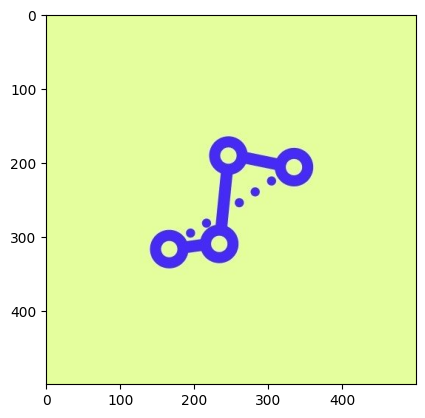

In [3]:
import matplotlib.pyplot as plt

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# from BGR to gray

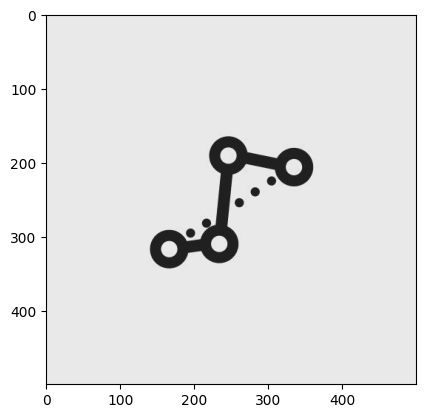

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [5]:
img.shape , gray.shape

((500, 500, 3), (500, 500))

# Filters


### Bluring

#### 1- Average Blur
Each pixel becomes the average of its neighbors.


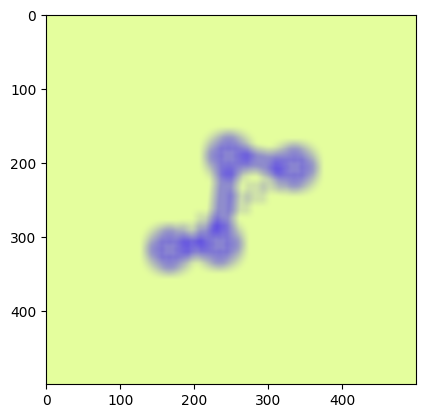

In [6]:
blur = cv2.blur(img_rgb, (30,30))  # kernel size 5x5
plt.imshow(blur)

#### 2- Gaussian Blur
Weights neighbors according to a Gaussian (closer pixels count more).

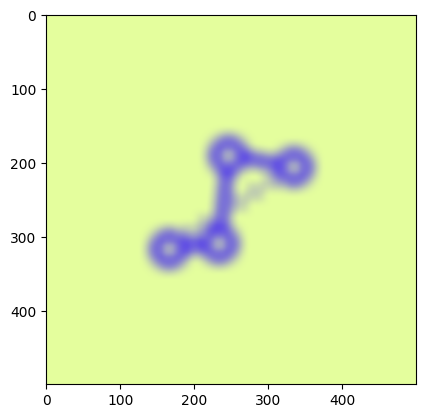

In [7]:
gblur = cv2.GaussianBlur(img_rgb, (31,31), 10)
plt.imshow(gblur)

#### 3-Median Blur
Replaces each pixel with the median of its neighbors (great for removing salt-and-pepper noise).

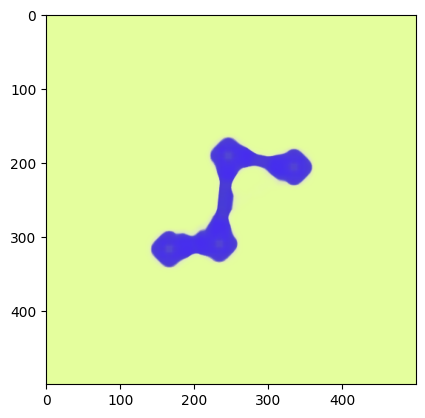

In [8]:
mblur = cv2.medianBlur(img_rgb, 29)
plt.imshow(mblur)

# Edge detection

### Sobel Edge Detection

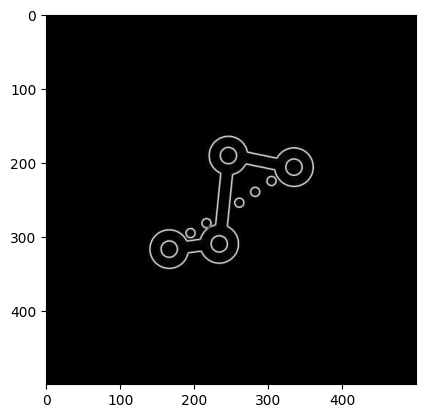

In [9]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # horizontal derivative
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # vertical derivative

magnitude = cv2.magnitude(sobelx, sobely) 
plt.imshow(magnitude, cmap='gray')

### Canny Edge Detector

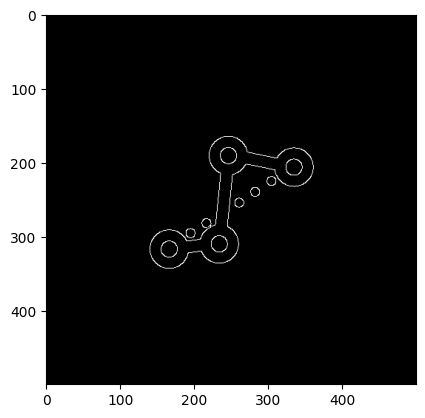

In [10]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

for c in corners:
    x, y = c.ravel()
    cv2.circle(img, (int(x), int(y)), 1, (0, 255, 0), -1)



In [12]:
cv2.imshow("Corners", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Infrared images


### contrast enhancement

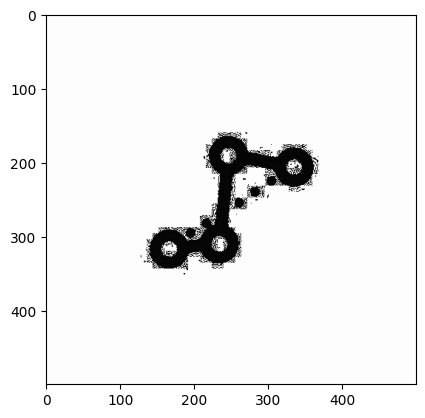

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 1) convert to grayscale
equalized = cv2.equalizeHist(gray)             # 2) enhance contrast
plt.imshow(equalized, cmap='gray')

In [14]:
frame = cv2.imread(r"C:\Users\Moussab\Desktop\OIP.jpg", 0)         
template = cv2.imread(r"C:\Users\Moussab\Desktop\template.png", 0)



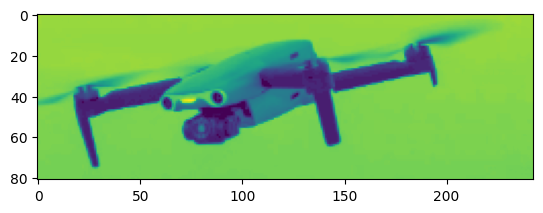

In [15]:
plt.imshow(template)

In [16]:
w, h = template.shape[::-1]

In [17]:
result = cv2.matchTemplate(frame, template, cv2.TM_CCOEFF_NORMED)  # 4) Slide template over frame


In [18]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)  # 5) Find best match


In [19]:
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)  # 6) Compute rectangle coordinates
cv2.rectangle(frame, top_left, bottom_right, 255, 2)  # 7) Draw rectangle on match


array([[235, 235, 235, ..., 229, 229, 229],
       [235, 235, 235, ..., 229, 229, 229],
       [235, 235, 235, ..., 229, 229, 229],
       ...,
       [157, 157, 158, ..., 165, 165, 165],
       [155, 155, 156, ..., 165, 165, 165],
       [154, 154, 156, ..., 165, 165, 165]], dtype=uint8)

In [7]:
import cv2

# Load first frame of the video
cap = cv2.VideoCapture(r"C:\Users\Moussab\Desktop\fin.mp4")
ret, frame = cap.read()
cap.release()  # we just need the first frame for selection

# Let the user select the ROI interactively
# This will open a window, you can drag a rectangle over your object
roi = cv2.selectROI("Select Object", frame, fromCenter=False, showCrosshair=True)

# roi is a tuple: (x, y, w, h)
x, y, w, h = roi
print("Selected ROI:", roi)

# Draw rectangle to confirm selection
cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2.imshow("Selected ROI", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


Selected ROI: (548, 181, 22, 3)


In [5]:
import cv2
import numpy as np

cap = cv2.VideoCapture(r"C:\Users\Moussab\Desktop\fin.mp4")  # 1) Open video
ret, frame = cap.read()              # 2) Read first frame

# 3) Define initial tracking window (x, y, width, height)

track_window = (x, y, w, h)

roi = frame[y:y+h, x:x+w]            # 4) Crop the object region (Region of Interest)
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)  # 5) Convert ROI to HSV color space
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.))) # 6) Mask to remove low-light pixels

roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])  # 7) Compute histogram of hue channel
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)    # 8) Normalize histogram

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)  # 9) Termination criteria


In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)             # 1) Convert frame to HSV
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)  # 2) Compute backprojection
    ret, track_window = cv2.meanShift(dst, track_window, term_crit) # 3) Apply MeanShift
    x, y, w, h = track_window
    img2 = cv2.rectangle(frame, (x,y), (x+w, y+h), 255, 2)       # 4) Draw rectangle
    cv2.imshow('Tracking', img2)
    
    if cv2.waitKey(30) & 0xFF == 27:
        break


KeyboardInterrupt: 

: 

In [6]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)             # 1) Convert frame to HSV
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)  # 2) Compute backprojection
    ret, track_window = cv2.CamShift(dst, track_window, term_crit)
    pts = cv2.boxPoints(ret)  # Get rotated rectangle points
    pts = np.int32(pts)
    cv2.polylines(frame, [pts], True, 255, 2)  # Draw rotated box
    cv2.imshow('Tracking', frame)
    
    if cv2.waitKey(30) & 0xFF == 27:
        break

KeyboardInterrupt: 

In [9]:
import cv2
import numpy as np
cap = cv2.VideoCapture(r"C:\Users\Moussab\Desktop\fin.mp4")  # 1) Open video
ret, frame = cap.read()


# --- Convert first frame to simulated IR for ROI selection ---
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
ir_frame = cv2.applyColorMap(gray, cv2.COLORMAP_JET)

# --- Select ROI interactively ---
roi = cv2.selectROI("Select Object", ir_frame, fromCenter=False, showCrosshair=True)
cv2.destroyWindow("Select Object") 
x, y, w, h = roi
track_window = (x, y, w, h)

# --- Prepare ROI histogram ---
roi_cropped = ir_frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0.,60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# --- Termination criteria for CamShift ---
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

In [10]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert current frame to IR-style
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ir_frame = cv2.applyColorMap(gray, cv2.COLORMAP_JET)

    # Back-projection
    hsv = cv2.cvtColor(ir_frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)

    # Apply CamShift
    ret, track_window = cv2.CamShift(dst, track_window, term_crit)
    x, y, w, h = track_window
    img2 = cv2.rectangle(ir_frame, (x,y), (x+w, y+h), 255, 2)       # 4) Draw rectangle
    cv2.imshow('Tracking', img2)
    # Exit on ESC
    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

# Load two consecutive frames (grayscale, could be IR images)
frame1 = cv2.imread(r"C:\Users\Moussab\Desktop\fg.png", 0)
frame2 = cv2.imread(r"C:\Users\Moussab\Desktop\fg2.png", 0)
frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))


# 1. Detect good features to track (corners)
p0 = cv2.goodFeaturesToTrack(frame1, maxCorners=100, qualityLevel=0.3, minDistance=7)

# 2. Calculate optical flow using Lucas-Kanade
p1, st, err = cv2.calcOpticalFlowPyrLK(frame1, frame2, p0, None)

# 3. Draw the tracks
frame_rgb = cv2.cvtColor(frame2, cv2.COLOR_GRAY2BGR)
for i, (new, old) in enumerate(zip(p1, p0)):
    if st[i] == 1:  # status = 1 means successfully tracked
        x_new, y_new = new.ravel()
        x_old, y_old = old.ravel()
        cv2.arrowedLine(frame_rgb, (int(x_old), int(y_old)), (int(x_new), int(y_new)), (0,255,0), 2)

cv2.imshow("Optical Flow", frame_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import cv2

# Load video
cap = cv2.VideoCapture(r"C:\Users\Moussab\Desktop\fin.mp4")  # 1) Open video

# Initialize tracker (CSRT here, can change to MOSSE or KCF)
tracker = cv2.legacy.TrackerMOSSE_create()

# Read first frame
ret, frame = cap.read()

# Select ROI (object to track)
bbox = cv2.selectROI("Tracking", frame, False)
tracker.init(frame, bbox)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    success, bbox = tracker.update(frame)
    if success:
        x, y, w, h = map(int, bbox)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    else:
        cv2.putText(frame, "Tracking lost", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    
    cv2.imshow("Tracker", frame)
    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()
